In [339]:
from PIL import Image
from IPython.display import display

import urllib.request
from io import BytesIO

In [156]:
import pandas as pd

# Columns in csv

# solar to Jupiter conversions
def Msolar2MJ(m):
    return 1047.57*m
def MJ2Msolar(m):
    return m/1047.57

# Read the companion CSV file
BDcomp_data = pd.read_csv("BDcomp.csv", skipinitialspace=True)
BDcomp_data.rename(columns={'# q': 'q'}, inplace=True)

# Read the host CSV file
BDhost_data = pd.read_csv("BDhost.csv", skipinitialspace=True)
BDhost_data.rename(columns={'# q': 'q'}, inplace=True)

# Read the BD SL CSV file
BDSL_data = pd.read_csv("BDSL.csv", skipinitialspace=True)
BDSL_data.rename(columns={'# q': 'q'}, inplace=True)

# Read the FFPs CSV file
BDFFPs_data = pd.read_csv("FFPS.csv", skipinitialspace=True)
BDFFPs_data.rename(columns={'# q': 'q'}, inplace=True)


In [157]:
# Add new mass columns
print(BDcomp_data.columns)
BDcomp_data['m1_MJ'] = BDcomp_data['m1_MSolar'].apply(Msolar2MJ)
BDcomp_data['m2_MSolar'] = BDcomp_data['m2_MJ'].apply(MJ2Msolar)
BDcomp_data['mtot_MJ'] = BDcomp_data['m1_MJ'] + BDcomp_data['m2_MJ']
BDcomp_data['mtot_MSolar'] = BDcomp_data['m1_MSolar'] + BDcomp_data['m2_MSolar']

# View the first 5 rows
BDcomp_data.head()

Index(['q', 'm1_MSolar', 'm2_MJ', 'P'], dtype='object')


,q,m1_MSolar,m2_MJ,P,m1_MJ,m2_MSolar,mtot_MJ,mtot_MSolar
0,0.0020,0.86,42.9,1.0,900.9102,0.040952,943.8102,0.900952
1,0.0290,1.07,31.8,1.0,1120.8999,0.030356,1152.6999,1.100356
2,0.0473,0.82,41.0,1.0,859.0074,0.039138,900.0074,0.859138
3,0.0500,0.64,34.0,1.0,670.4448,0.032456,704.4448,0.672456
4,0.0630,0.72,47.0,1.0,754.2504,0.044866,801.2504,0.764866


In [158]:
# Add new mass columns
print(BDhost_data.columns)
BDhost_data['m1_MJ'] = BDhost_data['m1_MSolar'].apply(Msolar2MJ)
BDhost_data['m2_MSolar'] = BDhost_data['m2_MJ'].apply(MJ2Msolar)
BDhost_data['mtot_MJ'] = BDhost_data['m1_MJ'] + BDhost_data['m2_MJ']
BDhost_data['mtot_MSolar'] = BDhost_data['m1_MSolar'] + BDhost_data['m2_MSolar']

## View the first 5 rows
BDhost_data.head()

Index(['q', 'm1_MSolar', 'm2_MJ', 'P'], dtype='object')


,q,m1_MSolar,m2_MJ,P,m1_MJ,m2_MSolar,mtot_MJ,mtot_MSolar
0,0.00005,0.08,0.0040,0.5,83.8056,0.000004,83.8096,0.080004
1,0.00008,0.08,0.0070,1.0,83.8056,0.000007,83.8126,0.080007
2,0.00200,0.08,0.1680,1.0,83.8056,0.000160,83.9736,0.080160
3,0.00500,0.08,0.4190,1.0,83.8056,0.000400,84.2246,0.080400
4,0.08000,0.08,0.0064,0.5,83.8056,0.000006,83.8120,0.080006


In [159]:
# Add new mass column
print(BDSL_data.columns)
BDSL_data['m1_MJ'] = BDSL_data['m1_MSolar'].apply(Msolar2MJ)

## View the first 5 rows
BDSL_data.head()

Index(['q', 'm1_MSolar', 'P'], dtype='object')


,q,m1_MSolar,P,m1_MJ
0,1.0,0.056,1.0,58.66392
1,1.0,0.043,1.0,45.04551
2,1.0,0.051,1.0,53.42607
3,1.0,0.044,1.0,46.09308
4,1.0,0.017,1.0,17.80869


In [160]:
# Add new mass column
print(BDFFPs_data.columns)
BDFFPs_data['m2_MSolar'] = BDFFPs_data['m2_MJ'].apply(MJ2Msolar)

## View the first 5 rows
BDFFPs_data.head()

Index(['q', 'm2_MJ', 'P'], dtype='object')


,q,m2_MJ,P,m2_MSolar
0,0.0,0.070,1.0,0.000067
1,0.0,0.002,1.0,0.000002


C:\Users\amber\AppData\Local\Temp\ipykernel_1152\3616446483.py:12: RuntimeWarning: divide by zero encountered in divide
  y = 80.0/x


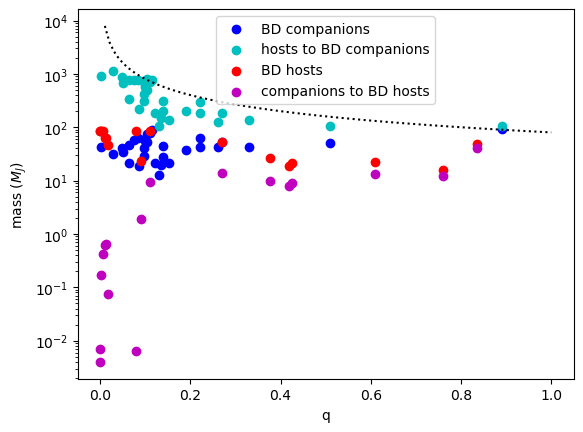

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Plot q versus mtot_MJ
plt.scatter(BDcomp_data['q'], BDcomp_data['m2_MJ'],color='b', label="BD companions")
plt.scatter(BDcomp_data['q'], BDcomp_data['m1_MJ'],color='c', label="hosts to BD companions")
plt.scatter(BDhost_data['q'], BDhost_data['m1_MJ'],color='r', label="BD hosts")
plt.scatter(BDhost_data['q'], BDhost_data['m2_MJ'],color='m', label="companions to BD hosts")
plt.yscale('log')
#plt.xscale('log')
x = np.linspace(0.0,1.0,100)
y = 80.0/x
plt.plot(x, y,'k:')
plt.xlabel('q')
plt.ylabel(r'mass ($M_J$)')
plt.legend(loc='upper center')
plt.show()


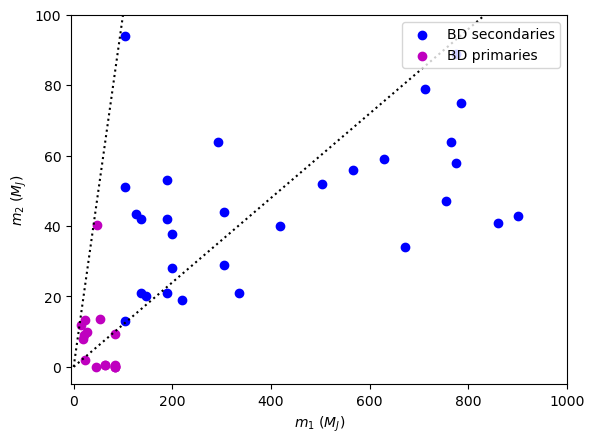

In [162]:
# Plot q versus mtot_MJ
plt.scatter(BDcomp_data['m1_MJ'], BDcomp_data['m2_MJ'],color='b', label="BD secondaries")
plt.scatter(BDhost_data['m1_MJ'], BDhost_data['m2_MJ'],color='m', label="BD primaries")
plt.xlabel(r'$m_1$ ($M_J$)')
plt.ylabel(r'$m_2$ ($M_J$)')
plt.plot([0,100],[0,100],'k:')
plt.plot([0,100/0.12],[0,100],'k:')
plt.xlim((-5, 1000))
plt.ylim((-5,100))
plt.legend(loc='upper right')
plt.show()

In [163]:
# 0.835, 0.046, 0.038, 1.0

Msolar2MJ(0.835*0.046)

40.237163699999996

https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.semanticscholar.org%2Fpaper%2FThe-Origin-and-Universality-of-the-Stellar-Initial-Offner-Clark%2F6831b6ae396893a9b1b64973a8ecea1824f50a61&psig=AOvVaw2iP6XnDjY1D5kS_w6W3FCx&ust=1705707000268000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCMjixI-M6IMDFQAAAAAdAAAAABAD

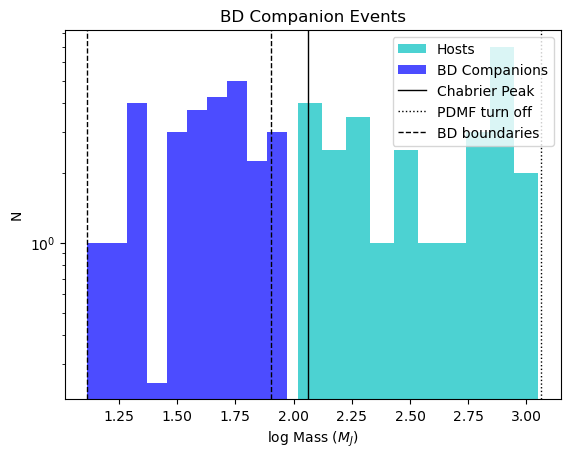

In [164]:
plt.hist(np.log10(BDcomp_data['m1_MJ']), bins=10, color='c', alpha=0.7, label="Hosts", weights=BDcomp_data['P'])
plt.hist(np.log10(BDcomp_data['m2_MJ']), bins=10, color='b', alpha=0.7, label="BD Companions", weights=BDcomp_data['P'])

# Chabrier turn over
plt.axvline(x=np.log10(Msolar2MJ(0.11)), color='k', linestyle='solid', linewidth=1, label=r'Chabrier Peak')
# PDMF turn over
plt.axvline(x=np.log10(Msolar2MJ(1.1)), color='k', linestyle='dotted', linewidth=1, label=r'PDMF turn off')
# BD Region
plt.axvline(x=np.log10(13), color='k', linestyle='dashed', linewidth=1, label=r'BD boundaries')
plt.axvline(x=np.log10(80), color='k', linestyle='dashed', linewidth=1)

plt.xlabel(r'log Mass ($M_J$)')
plt.ylabel('N')
plt.title('BD Companion Events')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()

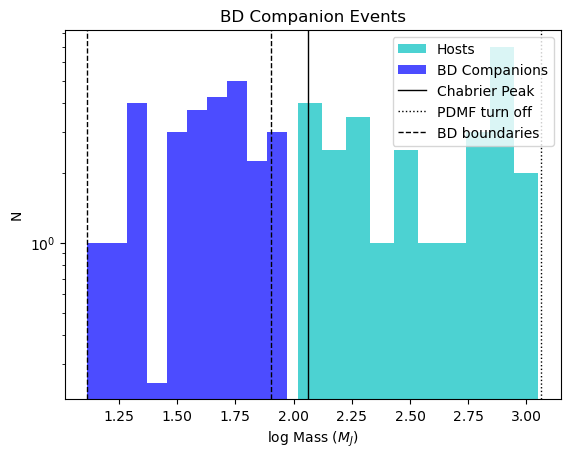

In [165]:
hosts = np.asarray(BDcomp_data['m1_MJ'])
comps = np.asarray(BDcomp_data['m2_MJ'])
q = np.asarray(BDcomp_data['q'])
points = np.where(q<0.18)


plt.hist(np.log10(BDcomp_data['m1_MJ']), bins=10, color='c', alpha=0.7, label="Hosts", weights=BDcomp_data['P'])
plt.hist(np.log10(BDcomp_data['m2_MJ']), bins=10, color='b', alpha=0.7, label="BD Companions", weights=BDcomp_data['P'])

# Chabrier turn over
plt.axvline(x=np.log10(Msolar2MJ(0.11)), color='k', linestyle='solid', linewidth=1, label=r'Chabrier Peak')
# PDMF turn over
plt.axvline(x=np.log10(Msolar2MJ(1.1)), color='k', linestyle='dotted', linewidth=1, label=r'PDMF turn off')
# BD Region
plt.axvline(x=np.log10(13), color='k', linestyle='dashed', linewidth=1, label=r'BD boundaries')
plt.axvline(x=np.log10(80), color='k', linestyle='dashed', linewidth=1)

plt.xlabel(r'log Mass ($M_J$)')
plt.ylabel('N')
plt.title('BD Companion Events')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()

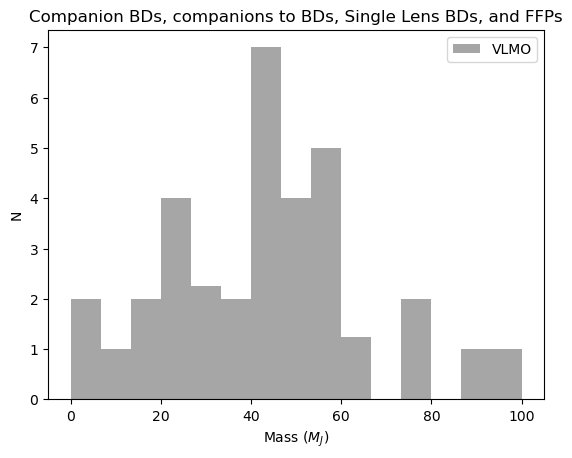

In [166]:
# Combine data and weights
BDs = (
    #BDcomp_data['m1_MJ'].tolist() + 
    BDcomp_data['m2_MJ'].tolist() + 
    BDFFPs_data['m2_MJ'].tolist()
    + BDSL_data['m1_MJ'].tolist()
)

weights = (
    #BDcomp_data['P'].tolist() + 
    BDcomp_data['P'].tolist() + 
    BDFFPs_data['P'].tolist()
    + BDSL_data['P'].tolist()
)

# Set bounds for the histogram
lower_bound = 0
upper_bound = 100

plt.hist(
    BDs,
    bins=15,
    range=(lower_bound, upper_bound),
    color='grey',
    alpha=0.7,
    label="VLMO",
    weights=weights
)

plt.title('Companion BDs, companions to BDs, Single Lens BDs, and FFPs')
plt.xlabel(r'Mass ($M_J$)')
plt.ylabel('N')
plt.legend(loc='upper right')
plt.show()


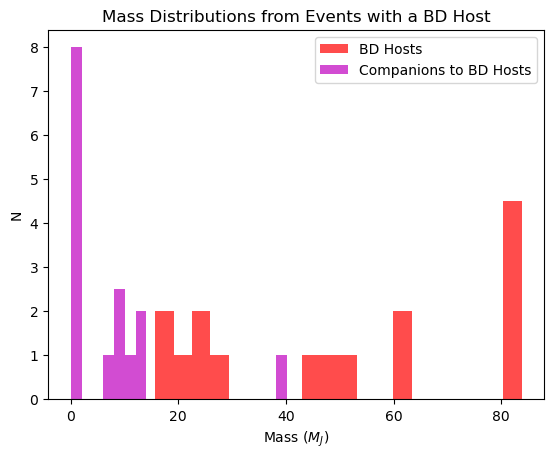

In [167]:
plt.hist(BDhost_data['m1_MJ'], bins=20, color='r', alpha=0.7, label="BD Hosts", weights=BDhost_data['P'])
plt.hist(BDhost_data['m2_MJ'], bins=20, color='m', alpha=0.7, label="Companions to BD Hosts", weights=BDhost_data['P'])

plt.xlabel(r'Mass ($M_J$)')
plt.ylabel('N')
plt.title('Mass Distributions from Events with a BD Host')
#plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()


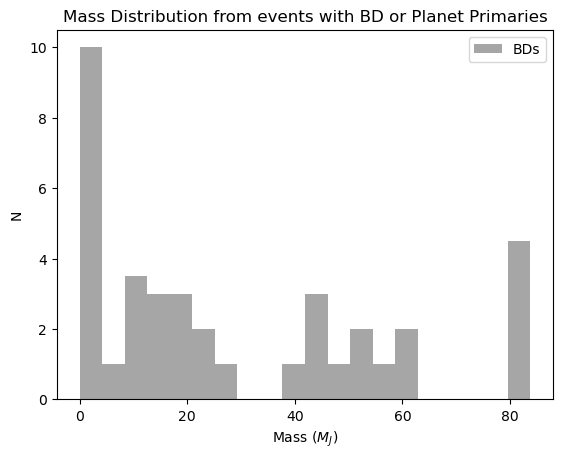

In [168]:
BDs = (
    BDhost_data['m1_MJ'].tolist() + 
    BDhost_data['m2_MJ'].tolist() + 
    BDFFPs_data['m2_MJ'].tolist() + 
    BDSL_data['m1_MJ'].tolist()
)
len(BDs)
weights = (
    BDhost_data['P'].tolist() + 
    BDhost_data['P'].tolist() + 
    BDFFPs_data['P'].tolist() + 
    BDSL_data['P'].tolist()
)

plt.hist(BDs, bins=20, color='grey', alpha=0.7, label="BDs", weights=weights)

plt.xlabel(r'Mass ($M_J$)')
plt.ylabel('N')
plt.title('Mass Distribution from events with BD or Planet Primaries')
#plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()



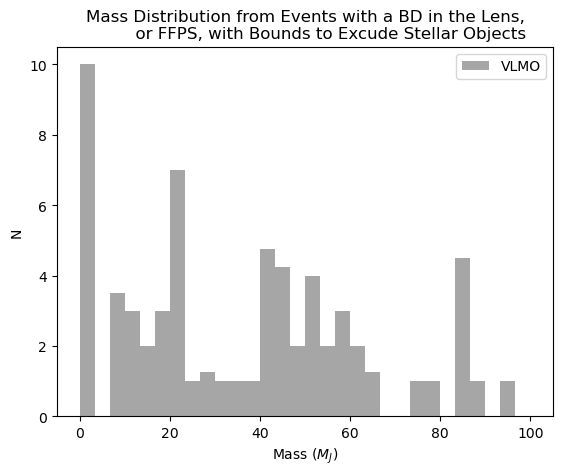

In [169]:
BDs = (
    BDcomp_data['m1_MJ'].tolist() + 
    BDcomp_data['m2_MJ'].tolist() +
    BDhost_data['m1_MJ'].tolist() + 
    BDhost_data['m2_MJ'].tolist() + 
    BDFFPs_data['m2_MJ'].tolist() + 
    BDSL_data['m1_MJ'].tolist()
)
len(BDs)
weights = (
    BDcomp_data['P'].tolist() + 
    BDcomp_data['P'].tolist() +
    BDhost_data['P'].tolist() + 
    BDhost_data['P'].tolist() + 
    BDFFPs_data['P'].tolist() + 
    BDSL_data['P'].tolist()
)

lower_bound = 0
upper_bound = 100

plt.hist(
    BDs,
    bins=30,
    range=(lower_bound, upper_bound),
    color='grey',
    alpha=0.7,
    label="VLMO",
    weights=weights
)

plt.xlabel(r'Mass ($M_J$)')
plt.ylabel('N')
plt.title('Mass Distribution from Events with a BD in the Lens,\n\
          or FFPS, with Bounds to Excude Stellar Objects')
#plt.xscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()

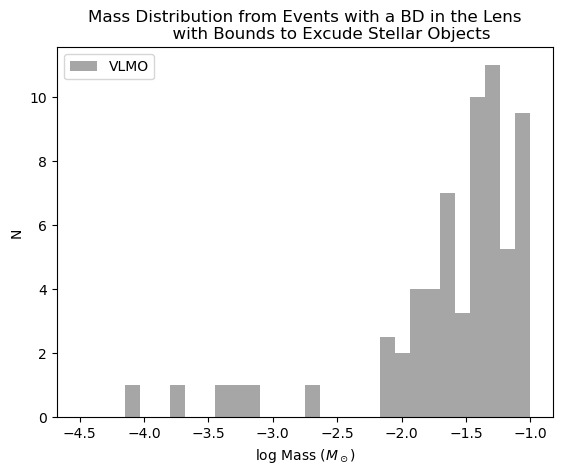

In [170]:
import numpy as np

BDs = (
    BDcomp_data['m1_MSolar'].tolist() + 
    BDcomp_data['m2_MSolar'].tolist() +
    BDhost_data['m1_MSolar'].tolist() + 
    BDhost_data['m2_MSolar'].tolist() + 
    #BDFFPs_data['m2_MSolar'].tolist() + 
    BDSL_data['m1_MSolar'].tolist()
)

BDs = np.array(BDs)
logBD = np.log10(BDs)


len(BDs)
weights = (
    BDcomp_data['P'].tolist() + 
    BDcomp_data['P'].tolist() +
    BDhost_data['P'].tolist() + 
    BDhost_data['P'].tolist() + 
    #BDFFPs_data['P'].tolist() + 
    BDSL_data['P'].tolist()
)

lower_bound = -4.5
upper_bound = -1

plt.hist(
    logBD,
    bins=30,
    range=(lower_bound, upper_bound),
    color='grey',
    alpha=0.7,
    label="VLMO",
    weights=weights
)

plt.xlabel(r'log Mass ($M_\odot$)')
plt.ylabel('N')
#plt.xscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.title('Mass Distribution from Events with a BD in the Lens\n\
          with Bounds to Excude Stellar Objects')
plt.legend(loc='upper left')
plt.show()

I am curious what it looks like when you fill it in with exoplanets

In [475]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
from astropy.table import Table

table_name = 'ML'

# Variables  - because it's hard to keep track of the stupid names they have been given
ID = ('pl_name', 'ID')  # this is the planet ID not the star ID or event ID
                        # e.g., OGLE-2009-BLG-0467L b
m1 = ('st_mass', 'm1')  # ML or m1 [solar mass]? It is m1
m2 = ('pl_massj', 'm2')  # companion mass [jupiter mass]
q = ('ml_massratio', 'q')  # lens body mass ratio (for binaries only)
s_au = ('pl_orbsmax', 's_au')  # lens body seperation [au]
s = ('ml_sepinsnorp', 's')  # lens body seperation [thetaE]
u0 = ('ml_sepminnorm', 'u0')  # closest angular seperations between source and lens 
RA = ('ra', 'RA')  # in degrees
Dec = ('dec', 'Dec')  # in degrees
l = ('glon', 'l')  # Galactic longitude (l) is measured with primary direction from the
                   # Sun to the center of the galaxy in the galactic plane
b = ('glat', 'b')  # Galactic latitude (b) measures the angle of the object above the 
                   # galactic plane.
DL = ('sy_dist', 'DL')  # distance to lens from Sun
ref = ('htmllink', 'ref')
cb_flag = ('cb_flag', 'binary_host')  # circumbinary flag
thetaE = ('ml_radeinang', 'thetaE')  # Einstein angle in radians
chi2 = ('ml_modelchisq', 'chi2')  # chi squared

# are there multiple entries for the same ID?
# i.e., multiple solutions

columns = [ID, m1, m2, q, s, s_au, u0, RA, Dec, l, b, DL, thetaE, chi2, ref]
columns_string = ''  # initialising

for i, variable in enumerate(columns):
    if i != 0:  # don't want to start the string with a comma
        columns_string += ','  # comma seperated w/o spaces
    columns_string += variable[0]

print(columns_string)  # to check it's formatted properly


pl_name,st_mass,pl_massj,ml_massratio,ml_sepinsnorp,pl_orbsmax,ml_sepminnorm,ra,dec,glon,glat,sy_dist,ml_radeinang,ml_modelchisq,htmllink


In [476]:
# this should force only binary lenses to be returned
conditions = 'pl_massj IS NOT NULL AND st_mass IS NOT NULL AND pl_orbsmax IS NOT NULL'

exoplanet_data = NasaExoplanetArchive.query_criteria(
    table=table_name,
    select=columns_string,
    format="csv",
    where=conditions
)

# use normal column names
for variable in columns:
    exoplanet_data.rename_column(variable[0], variable[1])

In [477]:
# Display the Table

exoplanet_data.show_in_notebook()
#KMT-2020-BLG-0414L c

idx,ID,m1,m2,q,s,s_au,u0,RA,Dec,l,b,DL,thetaE,chi2,ref,sky_coord
,,Msun,jupiterMass,,,AU,,deg,deg,deg,deg,kpc,mas,,,"deg,deg"
0,MOA-2013-BLG-605L b,0.198,0.06475,3.124,2.344,4.18,-0.0796,272.019257,-29.731583,1.76466,-4.63415,3550.0,0.503,15160.2,<a refstr=SUMI_ET_AL__2016 href=https://ui.adsabs.harvard.edu/abs/2016ApJ...825..112S/abstract target=ref>Sumi et al. 2016</a>,"272.019257,-29.731583"
1,OGLE-2005-BLG-390L b,0.22,0.017,0.76,1.61,2.6,0.359,268.579958,-30.377306,359.73255,-2.36161,6600.0,nan,562.26,<a refstr=BEAULIEU_ET_AL__2006 href=https://ui.adsabs.harvard.edu/abs/2006Natur.439..437B/abstract target=ref> Beaulieu et al. 2006 </a>,"268.579958,-30.377306"
2,OGLE-2012-BLG-0950L b,0.55,0.11,1.9,0.893,2.7,-0.1,272.019257,-29.731583,1.76466,-4.63415,3400.0,0.86,8055.8,<a refstr=KOSHIMOTO_ET_AL__2017 href=https://ui.adsabs.harvard.edu/abs/2017AJ....153....1K/abstract target=ref>Koshimoto et al. 2017</a>,"272.019257,-29.731583"
3,OGLE-2016-BLG-1067L b,0.31,0.43,13.17,0.785,1.71,-0.442,273.2045,-27.012639,4.66003,-4.25075,3780.0,nan,2566.0,<a refstr=CALCHI_NOVATI_ET_AL__2019 href=https://ui.adsabs.harvard.edu/abs/2019AJ....157..121C/abstract target=ref>Calchi Novati et al. 2019</a>,"273.2045,-27.012639"
4,OGLE-2005-BLG-071L b,0.46,3.8,77.0,1.305,3.6,0.0287,267.540708,-34.673194,355.58019,-3.78643,3200.0,0.84,1353.4,<a refstr=DONG_ET_AL__2009 href=https://ui.adsabs.harvard.edu/abs/2009ApJ...695..970D/abstract target=ref>Dong et al. 2009</a>,"267.540708,-34.673194"
5,OGLE-2018-BLG-0740L b,0.47,1.1,23.0,0.91,1.5,0.038,272.176958,-29.835806,1.73882,-4.80424,7200.0,0.28,1265.4,<a refstr=HAN_ET_AL__2019 href=https://ui.adsabs.harvard.edu/abs/2019AJ....158..102H/abstract target=ref>Han et al. 2019</a>,"272.176958,-29.835806"
6,OGLE-2016-BLG-1190L b,0.88,13.38,144.6,0.604,2.17,-0.01797,269.717926,-27.613556,2.6247,-1.83687,6770.0,0.49,14273.875,<a refstr=RYU_ET_AL__2018 href=https://ui.adsabs.harvard.edu/abs/2018AJ....155...40R/abstract target=ref>Ryu et al. 2018</a>,"269.717926,-27.613556"
7,OGLE-2017-BLG-0373L b,0.276,0.189,6.51,1.349,2.575,0.371,269.329407,-31.951723,358.6906,-3.70602,5810.0,0.317,2795.22,<a refstr=SKOWRON_ET_AL__2018 href=https://ui.adsabs.harvard.edu/abs/2018AcA....68...43S/abstract target=ref>Skowron et al. 2018</a>,"269.329407,-31.951723"
8,OGLE-2007-BLG-368L b,0.64,0.06,0.95,0.9255,2.8,0.0793,269.108167,-32.237417,358.34879,-3.6861,5900.0,0.529,2936.9,<a refstr=SUMI_ET_AL__2010 href=https://ui.adsabs.harvard.edu/abs/2010ApJ...710.1641S/abstract target=ref> Sumi et al. 2010 </a>,"269.108167,-32.237417"


In [471]:
m1_values = exoplanet_data['m1'].value.tolist()  # in solar masses
m2_values = exoplanet_data['m2'].value.tolist()  # in jupiter masses
m2S_values = []
m1J_values = []
for i in range(len(m2_values)):
    m2S_values.append(MJ2Msolar(m2_values[i]))
for i in range(len(m1_values)):
    m1J_values.append(Msolar2MJ(m1_values[i]))
q_values_hold = exoplanet_data['q'].value.tolist()
s_au_values = exoplanet_data['s_au'].value.tolist()
s_values = exoplanet_data['s'].value.tolist()
DL_values = exoplanet_data['DL'].value.tolist()
ID_list = exoplanet_data['ID'].value.tolist()

In [175]:
# tidying q
print(q_values_hold[0:5])
q_values = []
for ratio in q_values_hold:
    ratio = ratio*0.0001  # get rid of 10^-4 scaling 
    if ratio>1.0:  # force m1 > m2
        q_values.append(1.0/ratio)
        print('Warning: q above 1')
    else:
        q_values.append(ratio)
print(q_values[0:5])

[3.124, 0.76, 1.9, 13.17, 77.0]
[0.0003124, 7.6e-05, 0.00019, 0.001317, 0.0077]


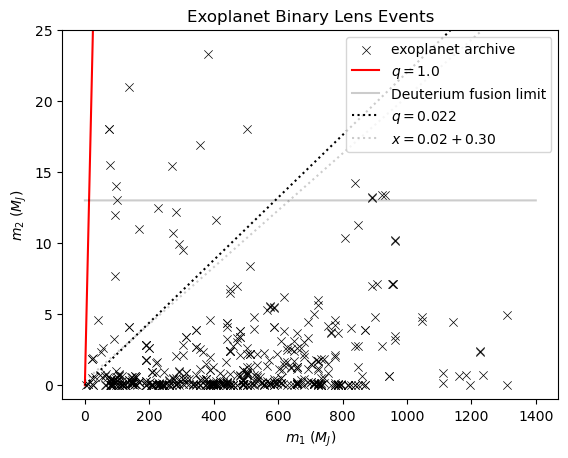

In [176]:
# Plot m1 vs m2
plt.scatter(
    m1J_values
    , m2_values
    , color='k'
    , marker='x'
    , lw=0.5
    , label='exoplanet archive'
)

# Annotationa
x = np.linspace(0.001, 1400.,1400)
y = x*1.0
plt.plot(x,y,'r-',label=r'$q=1.0$')
y = x*0.+13.0
plt.plot(x,y,'k-', alpha=0.2, label='Deuterium fusion limit')
#plt.plot([13.,13.],[0,25.],'k-', alpha=0.2)
y = x*0.022
plt.plot(x, y,'k:', label=r'$q=0.022$')
y = x*0.02+0.3
plt.plot(x, y,'k:', alpha=0.2, label=r'$x=0.02+0.30$')
# if m1 is actually Mtot
#y = x/(1.+1./0.0225)
#plt.plot(x,y)

# Plot stuff
plt.title('Exoplanet Binary Lens Events')
plt.xlabel(r'$m_1$ ($M_J$)')
plt.ylabel(r'$m_2$ ($M_J$)')
#plt.xlim((-20, 1000))
plt.ylim((-1,25))
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

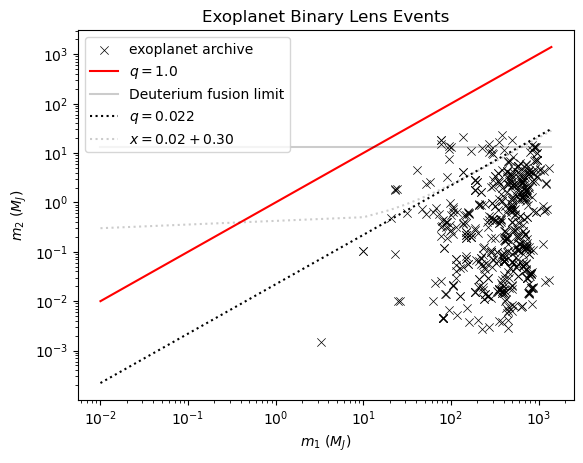

In [177]:
# Plot m1 vs m2
plt.scatter(
    m1J_values
    , m2_values
    , color='k'
    , marker='x'
    , lw=0.5
    , label='exoplanet archive'
)

# Annotations
x = np.linspace(0.01, 1400.,140)
y = x*1.0
plt.plot(x,y,'r-',label=r'$q=1.0$')
y = x*0.+13.0
plt.plot(x,y,'k-', alpha=0.2, label='Deuterium fusion limit')
#plt.plot([13.,13.],[0,25.],'k-', alpha=0.2)
y = x*0.022
plt.plot(x, y,'k:', label=r'$q=0.022$')
y = x*0.02+0.3
plt.plot(x, y,'k:', alpha=0.2, label=r'$x=0.02+0.30$')
# if m1 is actually Mtot
#y = x/(1.+1./0.0225)
#plt.plot(x,y)

# Plot stuff
plt.title('Exoplanet Binary Lens Events')
plt.xlabel(r'$m_1$ ($M_J$)')
plt.ylabel(r'$m_2$ ($M_J$)')
#plt.xlim((-20, 1000))
#plt.ylim((-1,25))
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper left')
plt.show()

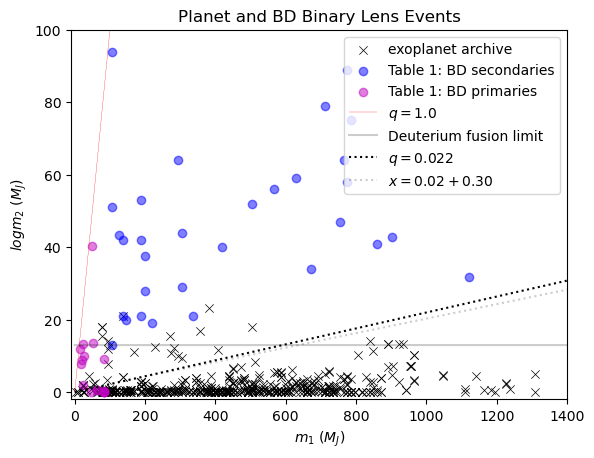

In [178]:
# Plot m1 vs m2
plt.scatter(
    m1J_values
    , m2_values
    , color='k'
    , marker='x'
    , lw=0.5
    , label='exoplanet archive'
)
plt.scatter(
    BDcomp_data['m1_MJ']
    , BDcomp_data['m2_MJ']
    , color='b'
    , label="Table 1: BD secondaries"
    , alpha=0.5
)
plt.scatter(
    BDhost_data['m1_MJ']
    , BDhost_data['m2_MJ']
    , color='m'
    , label="Table 1: BD primaries"
    , alpha=0.5
)

# Annotations
x = np.linspace(0.001, 1400.,1400)
y = x*1.0
plt.plot(x,y,'r-', lw=0.2, label=r'$q=1.0$')
y = x*0.+13.0
plt.plot(x,y,'k-', alpha=0.2, label='Deuterium fusion limit')
#plt.plot([13.,13.],[0,25.],'k-', alpha=0.2)
y = x*0.022
plt.plot(x, y,'k:', label=r'$q=0.022$')
y = x*0.02+0.3
plt.plot(x, y,'k:', alpha=0.2, label=r'$x=0.02+0.30$')

plt.xlabel(r'$m_1$ ($M_J$)')
plt.ylabel(r'$log m_2$ ($M_J$)')
plt.title('Planet and BD Binary Lens Events')
plt.xlim((-10, 1400.))
plt.ylim((-2,100.))
#plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

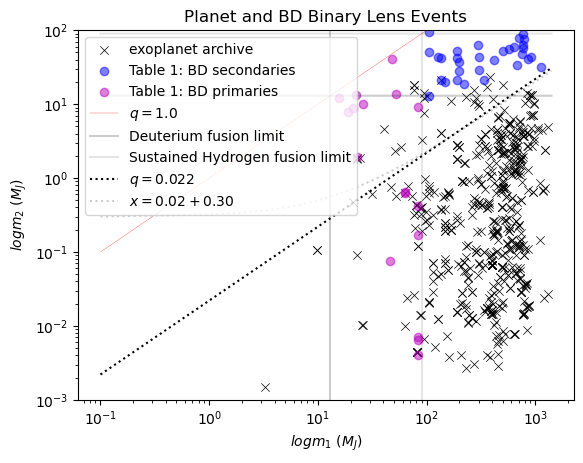

In [179]:
# Plot m1 vs m2
plt.scatter(
    m1J_values
    , m2_values
    , color='k'
    , marker='x'
    , lw=0.5
    , label='exoplanet archive'
)
plt.scatter(
    BDcomp_data['m1_MJ']
    , BDcomp_data['m2_MJ']
    , color='b'
    , label="Table 1: BD secondaries"
    , alpha=0.5
)
plt.scatter(
    BDhost_data['m1_MJ']
    , BDhost_data['m2_MJ']
    , color='m'
    , label="Table 1: BD primaries"
    , alpha=0.5
)

# Annotations
x = np.linspace(0.1, 1400.,1400)
y = x*1.0
plt.plot(x,y,'r-', lw=0.2, label=r'$q=1.0$')
y = x*0.+13.0
plt.plot(x,y,'k-', alpha=0.2, label='Deuterium fusion limit')
y = x*0.+ 90.0
plt.plot(x,y,'k-', alpha=0.1, label='Sustained Hydrogen fusion limit')
#plt.plot([13.,13.],[0,25.],'k-', alpha=0.2)
y = x*0.022
plt.plot(x, y,'k:', label=r'$q=0.022$')
y = x*0.02+0.3
plt.plot(x, y,'k:', alpha=0.2, label=r'$x=0.02+0.30$')
#y = x*0.012
#plt.plot(x, y,'k:', alpha=0.2, label=r'$q=0.012$')
y = np.linspace(0.001,1000.,1000)
x = y*0.+13.0
plt.plot(x,y,'k-', alpha=0.2)
x = y*0.+ 90.0
plt.plot(x,y,'k-', alpha=0.1)

plt.xlabel(r'$log m_1$ ($M_J$)')
plt.ylabel(r'$log m_2$ ($M_J$)')
plt.title('Planet and BD Binary Lens Events')
#plt.xlim((-20, np.log10(1000))
plt.ylim((0.001,100.))
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='upper left')
plt.show()

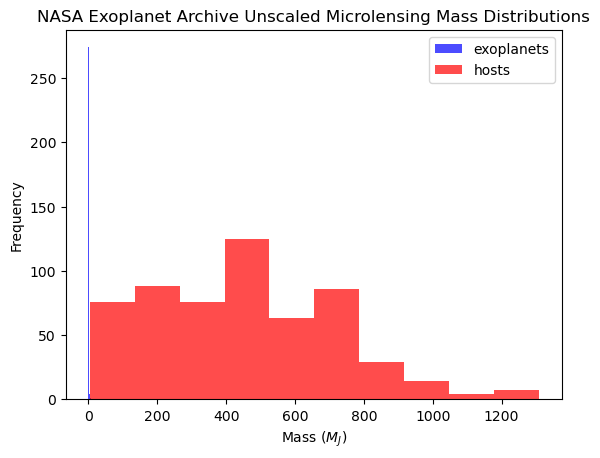

In [180]:


plt.hist(m2_values, bins=100, color='blue', alpha=0.7, label='exoplanets')
plt.hist(m1J_values, bins=10, color='red', alpha=0.7, label='hosts')
plt.title('NASA Exoplanet Archive Unscaled Microlensing Mass Distributions')
plt.xlabel(r'Mass ($M_J$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

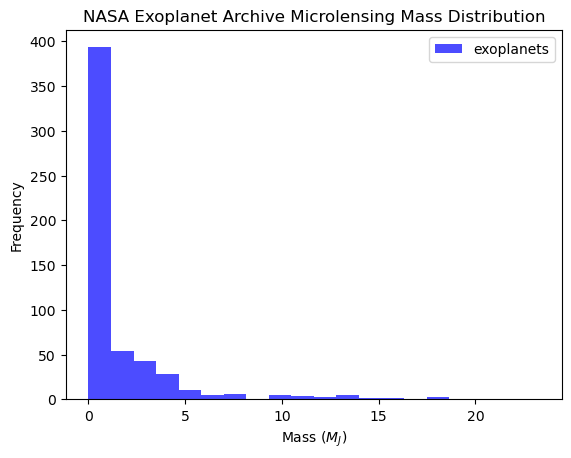

In [181]:
plt.hist(m2_values, bins=20, color='blue', alpha=0.7, label='exoplanets')
plt.title('NASA Exoplanet Archive Microlensing Mass Distribution')
plt.xlabel(r'Mass ($M_J$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

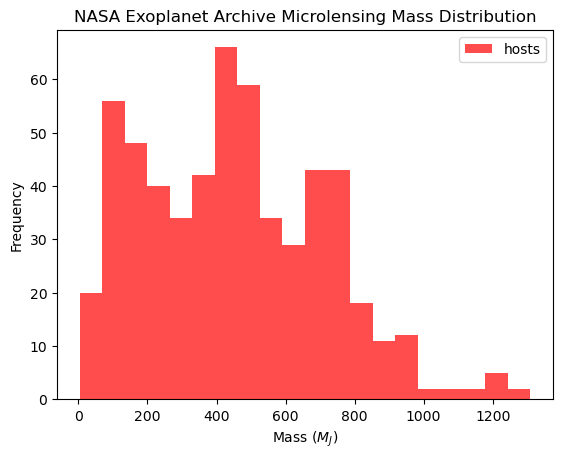

In [182]:
plt.hist(m1J_values, bins=20, color='red', alpha=0.7, label='hosts')
plt.title('NASA Exoplanet Archive Microlensing Mass Distribution')
plt.xlabel(r'Mass ($M_J$)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

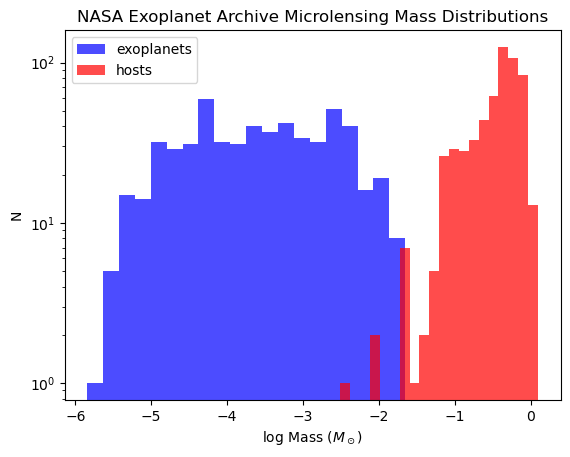

In [230]:
plt.hist(np.log10(m2S_values), bins=20, color='blue', alpha=0.7, label='exoplanets')
plt.hist(np.log10(m1_values), bins=20, color='red', alpha=0.7, label='hosts')
plt.title('NASA Exoplanet Archive Microlensing Mass Distributions')
plt.xlabel(r'log Mass ($M_\odot$)')
plt.ylabel('N')
plt.yscale('log')
plt.legend()
plt.show()

In [184]:
Msolar2MJ(10**(-1.6))

26.3137686905649

In [185]:
# nonsense to check how to make a list of ones the same length as an existing list
listy = [1,2,3,4,5,6]
lilly = [1]
pop = lilly*len(listy)
print(pop)

import sys

def oneslistlike(list):
    one = [1]
    if type(list) == type(one):
        ones = one*len(list)
        return ones
    else:
        sys.exit("Error: 'oneslikelist()' accepts only list arguments")

[1, 1, 1, 1, 1, 1]


In [186]:
# Checking how list addition works
listt = [1,2,3]
listtt = [4,5]
listt+listtt

[1, 2, 3, 4, 5]

In [336]:
# checking m1 isn't actually Mtot

print(q_values)
m = np.array(m2S_values)[0:10]*(1+1/np.array(q_values)[0:10])
print(m)
m = np.array(m2S_values)[0:10]/np.array(q_values)[0:10]
print(m)
print(m1_values[0:10])
for i, qqq in enumerate(q_values):
    if qqq>0.2:
        print(i, q)
# i = 12 , 275
m = np.array(m2S_values)[12]*(1+1/np.array(q_values)[12])
print('m = mtot:', m)
m = np.array(m2S_values)[12]/np.array(q_values)[12]
print('m = m1:', m)
print('m = ', m1_values[12])
m = np.array(m2S_values)[275]*(1+1/np.array(q_values)[275])
print('m = mtot:', m)
m = np.array(m2S_values)[275]/np.array(q_values)[275]
print('m = m1:', m)
print('m = ', m1_values[275])

print()
for i, m in enumerate(m1J_values):
    if m < 10:
        print(i, m, m2S_values[i], q_values[i])


[0.0003124, 7.6e-05, 0.00019, 0.001317, 0.0077, 0.0023, 0.01446, 0.000651, 9.5e-05, 0.0001827, 0.0014, 0.113, 0.203, 0.005591, 0.00019, 0.00019, 1.8290000000000003e-05, 0.00038, nan, 0.0455, 0.00743, 0.00554, 0.0003856, 6.15e-05, 0.00324, 0.01056, 0.0005957, 0.00020521, 0.00013000000000000002, 5.6000000000000006e-05, 0.014400000000000001, 0.00454, 0.01, 0.01047, 0.00012, 0.0021300000000000004, 0.00428, 0.0071, 0.007, 0.01332, 0.0005753, 0.00354, 0.0004451, 0.000167, 0.00095, 0.000167, 0.009250000000000001, 0.001544, 0.000952, 0.00019, 0.01606, 0.000168, 0.003923, 0.12486, nan, 0.12281, 5.4300000000000005e-05, 0.0159, 0.00019, 0.003529, 4.8e-05, 7.55e-05, 0.01276, 8.010000000000001e-05, 0.009534, 0.14300000000000002, 0.00040540000000000004, 0.008033400000000001, 0.00685, 0.0053, 0.13, 0.014400000000000001, 0.00045999999999999996, 0.0284, 0.0151, 0.0044, 0.0045000000000000005, 0.004171, 0.00042, 0.00017, 5.580000000000001e-05, 0.00019, 0.00538, 0.00192, 0.015700000000000002, 8.831e-05, 0

In [223]:
def planetsVstars(Q, q_, m1_, m2_):
    ''' Seperates binaries pairs into planets or stars based on the event mass ratio'''
    m1P, m2P, m1S, m2S = [], [], [], []

    for i, q in enumerate(q_):
        if q > Q:
            m1S.append(m1_[i])
            m2S.append(m2_[i])
        else:
            m1P.append(m1_[i])
            m2P.append(m2_[i])
    
    P = m2P
    S = m1P + m2S + m1S

    return P, S

[0.0003124, 7.6e-05, 0.00019, 0.001317, 0.0077, 0.0023, 0.01446, 0.000651, 9.5e-05, 0.0001827, 0.0014, 0.113, 0.203, 0.005591, 0.00019, 0.00019, 1.8290000000000003e-05, 0.00038, nan, 0.0455, 0.00743, 0.00554, 0.0003856, 6.15e-05, 0.00324, 0.01056, 0.0005957, 0.00020521, 0.00013000000000000002, 5.6000000000000006e-05, 0.014400000000000001, 0.00454, 0.01, 0.01047, 0.00012, 0.0021300000000000004, 0.00428, 0.0071, 0.007, 0.01332, 0.0005753, 0.00354, 0.0004451, 0.000167, 0.00095, 0.000167, 0.009250000000000001, 0.001544, 0.000952, 0.00019, 0.01606, 0.000168, 0.003923, 0.12486, nan, 0.12281, 5.4300000000000005e-05, 0.0159, 0.00019, 0.003529, 4.8e-05, 7.55e-05, 0.01276, 8.010000000000001e-05, 0.009534, 0.14300000000000002, 0.00040540000000000004, 0.008033400000000001, 0.00685, 0.0053, 0.13, 0.014400000000000001, 0.00045999999999999996, 0.0284, 0.0151, 0.0044, 0.0045000000000000005, 0.004171, 0.00042, 0.00017, 5.580000000000001e-05, 0.00019, 0.00538, 0.00192, 0.015700000000000002, 8.831e-05, 0

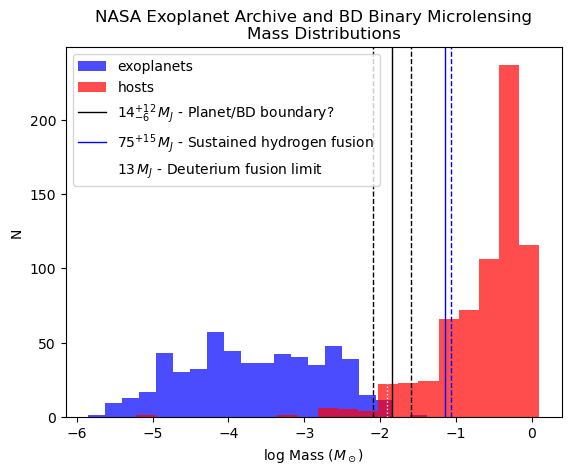

In [325]:
Q = 0.02
print(q_values)
print(m1_values) 
print(m2S_values)
print(len(q_values), len(m1_values), len(m2S_values))
P_022_NEA, S_022_NEA = planetsVstars(Q, q_values, m1_values, m2S_values)
print(P_022_NEA)
print(S_022_NEA)
print(len(P_022_NEA), len(S_022_NEA))
m2_MS_BD = BDhost_data['m2_MSolar'].tolist() + BDcomp_data['m2_MSolar'].tolist()
m1_MS_BD = BDhost_data['m1_MSolar'].tolist() + BDcomp_data['m1_MSolar'].tolist()
q_BD = BDhost_data['q'].tolist() + BDcomp_data['q'].tolist()
P_022_BD, S_022_BD = planetsVstars(Q, q_BD, m1_MS_BD, m2_MS_BD)

# a stacked histogram based on q-break populations
plt.hist(np.log10(P_022_NEA + P_022_BD), bins=20, color='blue', alpha=0.7, label='exoplanets')
plt.hist(np.log10(S_022_NEA + S_022_BD), bins=20, color='red', alpha=0.7, label='hosts')

plt.axvline(x=-1.85, color='black', linestyle='solid', linewidth=1, label=r'$14^{+12}_{-6}\,M_J$ - Planet/BD boundary?')
plt.axvline(x=-1.6, color='black', linestyle='dashed', linewidth=1)
plt.axvline(x=-2.1, color='black', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(MJ2Msolar(75)), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=np.log10(MJ2Msolar(90)), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(MJ2Msolar(13)), color='white', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')

plt.title('NASA Exoplanet Archive and BD Binary Microlensing\n\
    Mass Distributions')
plt.xlabel(r'log Mass ($M_\odot$)')
plt.ylabel('N')
#plt.yscale('log')
#plt.ylim((0,1000))
plt.legend()

plt.show()

In [327]:
print(Msolar2MJ(10**-5))

0.010475700000000001


In [202]:
cut_off = Msolar2MJ(10.0**(np.array([-2.1,-1.85,-1.6])))
print(cut_off)
print(cut_off[1], cut_off[2]-cut_off[1], cut_off[1]-cut_off[0])

[ 8.32114429 14.79731956 26.31376869]
14.797319556204583 11.516449134360316 6.476175267703429


568 568 568


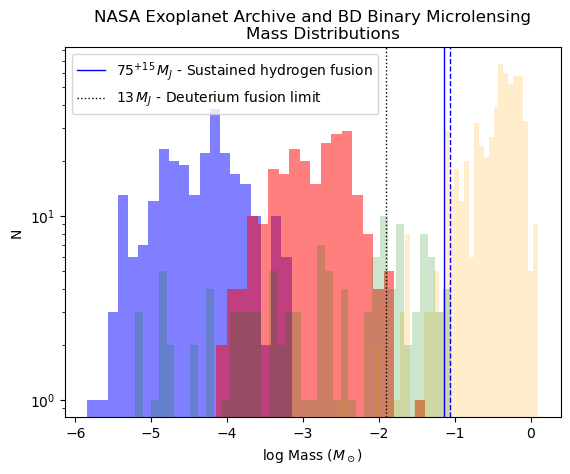

In [324]:
Q1 = 0.001
Q2 = 0.02

def threewaysplit(Q1, Q2, q_, m1_, m2_):
    P1, P2, H1, H2, S1, S2 = [], [], [], [], [], []

    for i, q in enumerate(q_):
        if q < Q1:
            H1.append(m1_[i])
            P1.append(m2_[i])
        elif q < Q2:
            H2.append(m1_[i])
            P2.append(m2_[i])
        else:
            S1.append(m1_[i])
            S2.append(m2_[i])
    
    return P1, P2, H1, H2, S1, S2

print(len(q_values), len(m1_values), len(m2S_values))   
P1_NEA, P2_NEA, H1_NEA, H2_NEA, S1_NEA, S2_NEA = threewaysplit(Q1, Q2, q_values, m1_values, m2S_values)

m2_MS_BD = BDhost_data['m2_MSolar'].tolist() + BDcomp_data['m2_MSolar'].tolist()
m1_MS_BD = BDhost_data['m1_MSolar'].tolist() + BDcomp_data['m1_MSolar'].tolist()
q_BD = BDhost_data['q'].tolist() + BDcomp_data['q'].tolist()

P1_BD, P2_BD, H1_BD, H2_BD, S1_BD, S2_BD = threewaysplit(Q1, Q2, q_BD, m1_MS_BD, m2_MS_BD)

# a stacked histogram based on q-break populations
plt.hist(np.log10(P1_NEA + P1_BD), bins=20, color='blue', alpha=0.5)
plt.hist(np.log10(P2_NEA + P2_BD), bins=20, color='red', alpha=0.5)
plt.hist(np.log10(H1_NEA + H1_BD + H2_NEA + H2_BD + S1_NEA + S1_BD), bins=40, color='orange', alpha=0.2)
plt.hist(np.log10(S2_NEA + S2_BD), bins=40, color='green', alpha=0.2)
# I feel like the really low mass objects in here don't make sense


plt.axvline(x=np.log10(MJ2Msolar(75)), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=np.log10(MJ2Msolar(90)), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(MJ2Msolar(13)), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')

plt.title('NASA Exoplanet Archive and BD Binary Microlensing\n\
    Mass Distributions')
plt.xlabel(r'log Mass ($M_\odot$)')
plt.ylabel('N')
plt.yscale('log')
#plt.ylim((0,1000))
plt.legend()


plt.show()

568 568 568


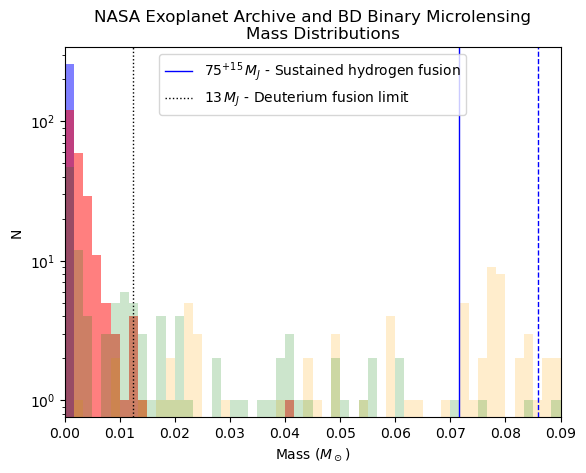

In [440]:
Q1 = 0.001
Q2 = 0.02

def threewaysplit(Q1, Q2, q_, m1_, m2_):
    P1, P2, H1, H2, S1, S2 = [], [], [], [], [], []

    for i, q in enumerate(q_):
        if q < Q1:
            H1.append(m1_[i])
            P1.append(m2_[i])
        elif q < Q2:
            H2.append(m1_[i])
            P2.append(m2_[i])
        else:
            S1.append(m1_[i])
            S2.append(m2_[i])
    
    return P1, P2, H1, H2, S1, S2

print(len(q_values), len(m1_values), len(m2S_values))   
P1_NEA, P2_NEA, H1_NEA, H2_NEA, S1_NEA, S2_NEA = threewaysplit(Q1, Q2, q_values, m1_values, m2S_values)

m2_MS_BD = BDhost_data['m2_MSolar'].tolist() + BDcomp_data['m2_MSolar'].tolist()
m1_MS_BD = BDhost_data['m1_MSolar'].tolist() + BDcomp_data['m1_MSolar'].tolist()
q_BD = BDhost_data['q'].tolist() + BDcomp_data['q'].tolist()

P1_BD, P2_BD, H1_BD, H2_BD, S1_BD, S2_BD = threewaysplit(Q1, Q2, q_BD, m1_MS_BD, m2_MS_BD)

lower_bound = 10**-5.5
upper_bound = 0.1

# a stacked histogram based on q-break populations
plt.hist(P1_NEA + P1_BD, bins=60, range=(lower_bound, upper_bound), color='blue', alpha=0.5)
plt.hist(P2_NEA + P2_BD, bins=60, range=(lower_bound, upper_bound), color='red', alpha=0.5)
plt.hist(\
    H1_NEA + H1_BD + H2_NEA + H2_BD + S1_NEA + S1_BD\
    , bins=60\
    , range=(lower_bound, upper_bound)\
    , color='orange', alpha=0.2\
)
plt.hist(\
    S2_NEA + S2_BD\
    , bins=60\
    , range=(lower_bound, upper_bound)\
    , color='green'\
    , alpha=0.2\
)
# I feel like the really low mass objects in here don't make sense

plt.axvline(x=MJ2Msolar(75), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=MJ2Msolar(90), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=MJ2Msolar(13), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')

plt.title('NASA Exoplanet Archive and BD Binary Microlensing\n\
    Mass Distributions')
plt.xlabel(r'Mass ($M_\odot$)')
plt.ylabel('N')
#plt.xscale('log')
plt.yscale('log')
plt.xlim((0,0.09))
plt.legend()


plt.show()

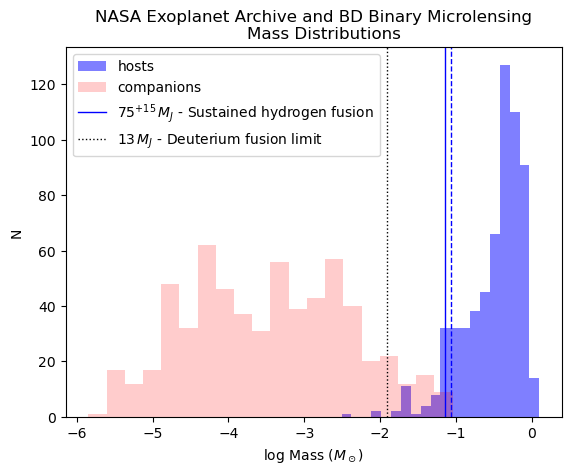

In [286]:
# Cheching that the unmanipulated distributions match the split ones

#m1_values, m2S_values
m2_MS_BD = BDhost_data['m2_MSolar'].tolist() + BDcomp_data['m2_MSolar'].tolist()
m1_MS_BD = BDhost_data['m1_MSolar'].tolist() + BDcomp_data['m1_MSolar'].tolist()


# a stacked histogram based on q-break populations
plt.hist(np.log10(m1_MS_BD + m1_values), bins=20, color='blue', alpha=0.5, label='hosts')
plt.hist(np.log10(m2_MS_BD + m2S_values), bins=20, color='red', alpha=0.2, label='companions')

plt.axvline(x=np.log10(MJ2Msolar(75)), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=np.log10(MJ2Msolar(90)), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(MJ2Msolar(13)), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')

plt.title('NASA Exoplanet Archive and BD Binary Microlensing\n\
    Mass Distributions')
plt.xlabel(r'log Mass ($M_\odot$)')
plt.ylabel('N')
#plt.yscale('log')
#plt.ylim((0,1000))
plt.legend()

plt.show()

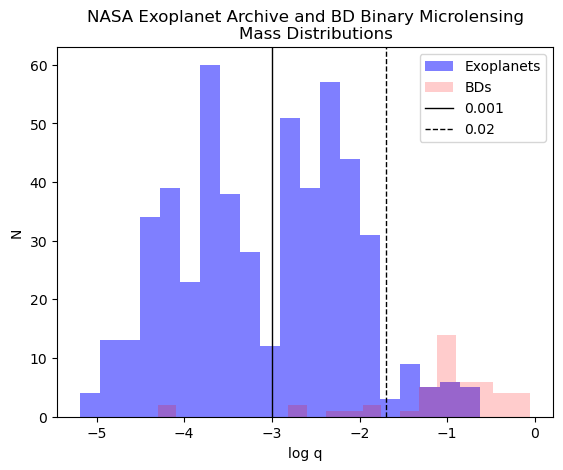

In [307]:
# Cheching that the unmanipulated distributions match the split ones

#q_values
q_BD = BDhost_data['q'].tolist() + BDcomp_data['q'].tolist()


# a stacked histogram based on q-break populations
plt.hist(np.log10(q_values), bins=20, color='blue', alpha=0.5, label='Exoplanets')
plt.hist(np.log10(q_BD), bins=20, color='red', alpha=0.2, label='BDs')

plt.axvline(x=np.log10(0.001), color='black', linestyle='solid', linewidth=1, label=r'0.001')
plt.axvline(x=np.log10(0.02), color='black', linestyle='dashed', linewidth=1, label=r'0.02')
#plt.axvline(x=np.log10(0.2), color='black', linestyle='dotted', linewidth=1, label=r'0.2')

plt.title('NASA Exoplanet Archive and BD Binary Microlensing\n\
    Mass Distributions')
plt.xlabel(r'log q')
plt.ylabel('N')
#plt.yscale('log')
#plt.ylim((0,1000))
plt.legend()

plt.show()

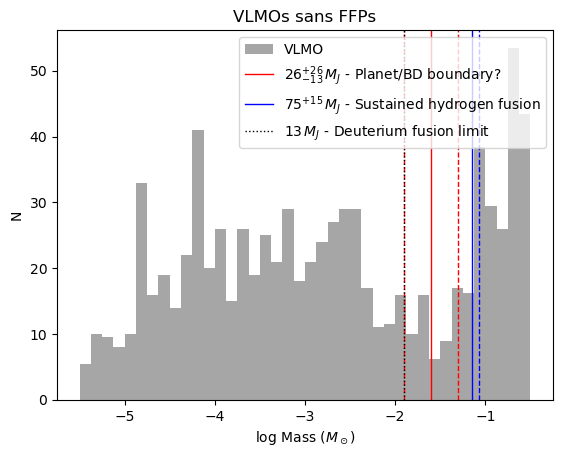

In [194]:
import numpy as np


VLMOs = (m1_values + m2S_values +
    BDcomp_data['m1_MSolar'].tolist() + 
    BDcomp_data['m2_MSolar'].tolist() +
    BDhost_data['m1_MSolar'].tolist() + 
    BDhost_data['m2_MSolar'].tolist() + 
    #BDFFPs_data['m2_MSolar'].tolist() + 
    BDSL_data['m1_MSolar'].tolist()
)

VLMOs = np.array(VLMOs)
logVLMO = np.log10(VLMOs)

w = oneslistlike(m1_values)
weights = (w + w +
    BDcomp_data['P'].tolist() + 
    BDcomp_data['P'].tolist() +
    BDhost_data['P'].tolist() + 
    BDhost_data['P'].tolist() + 
    #BDFFPs_data['P'].tolist() + 
    BDSL_data['P'].tolist()
)

lower_bound = -5.5
upper_bound = -0.5

plt.hist(
    logVLMO,
    bins=40,
    range=(lower_bound, upper_bound),
    color='grey',
    alpha=0.7,
    label="VLMO",
    weights=weights
)
plt.axvline(x=-1.6, color='red', linestyle='solid', linewidth=1, label=r'$26^{+26}_{-13}\,M_J$ - Planet/BD boundary?')
plt.axvline(x=-1.3, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=-1.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(MJ2Msolar(75)), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=np.log10(MJ2Msolar(90)), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(MJ2Msolar(13)), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')
plt.xlabel(r'log Mass ($M_\odot$)')
plt.ylabel('N')
plt.title('VLMOs sans FFPs')
plt.legend(loc='upper right')
plt.show()

In [195]:
print(10**-1.9, 10**-1.6, 10**-1.3)

0.012589254117941675 0.025118864315095794 0.05011872336272722


In [196]:
print(Msolar2MJ(0.0125), Msolar2MJ(0.0251), Msolar2MJ(0.0501))
print(52.483-26.294, 26.294-13.095)

13.094625 26.294007 52.483256999999995
26.188999999999997 13.199


planet/BD boundary at $26^{+26}_{-13}\,M_J$?

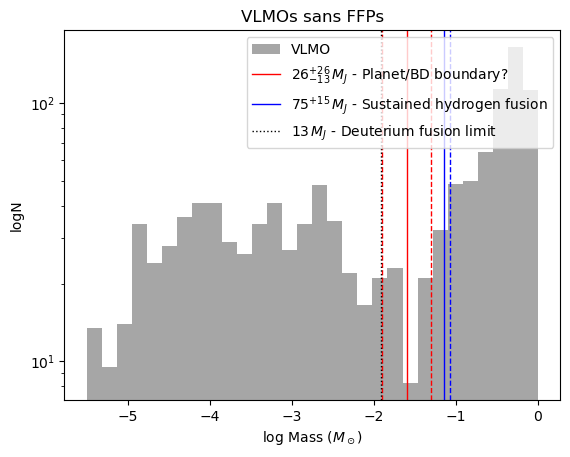

In [197]:
import numpy as np


VLMOs = (m1_values + m2S_values +
    BDcomp_data['m1_MSolar'].tolist() + 
    BDcomp_data['m2_MSolar'].tolist() +
    BDhost_data['m1_MSolar'].tolist() + 
    BDhost_data['m2_MSolar'].tolist() + 
    #BDFFPs_data['m2_MSolar'].tolist() + 
    BDSL_data['m1_MSolar'].tolist()
)

VLMOs = np.array(VLMOs)
logVLMO = np.log10(VLMOs)

w = oneslistlike(m1_values)
weights = (w + w +
    BDcomp_data['P'].tolist() + 
    BDcomp_data['P'].tolist() +
    BDhost_data['P'].tolist() + 
    BDhost_data['P'].tolist() + 
    #BDFFPs_data['P'].tolist() + 
    BDSL_data['P'].tolist()
)

lower_bound = -5.5
upper_bound = 0.0

plt.hist(
    logVLMO,
    bins=30,
    range=(lower_bound, upper_bound),
    color='grey',
    alpha=0.7,
    label="VLMO",
    weights=weights
)
plt.axvline(x=-1.6, color='red', linestyle='solid', linewidth=1, label=r'$26^{+26}_{-13}\,M_J$ - Planet/BD boundary?')
plt.axvline(x=-1.3, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=-1.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(MJ2Msolar(75)), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=np.log10(MJ2Msolar(90)), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=np.log10(MJ2Msolar(13)), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')
plt.xlabel(r'log Mass ($M_\odot$)')
plt.title('VLMOs sans FFPs')
plt.ylabel('logN')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()

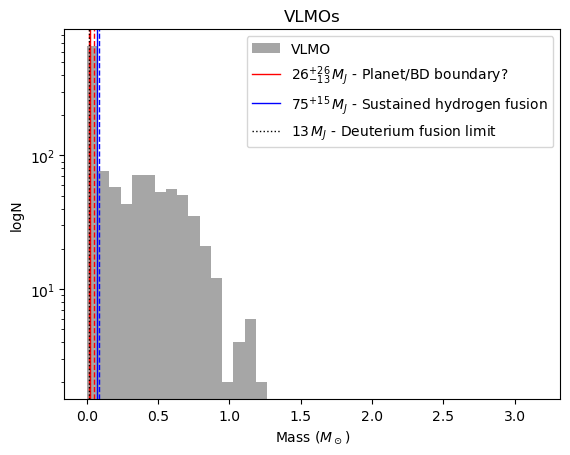

In [198]:
import numpy as np


VLMOs = (m1_values + m2S_values +
    BDcomp_data['m1_MSolar'].tolist() + 
    BDcomp_data['m2_MSolar'].tolist() +
    BDhost_data['m1_MSolar'].tolist() + 
    BDhost_data['m2_MSolar'].tolist() + 
    #BDFFPs_data['m2_MSolar'].tolist() + 
    BDSL_data['m1_MSolar'].tolist()
)

VLMOs = np.array(VLMOs)
#logVLMO = np.log10(VLMOs)

w = oneslistlike(m1_values)
weights = (w + w +
    BDcomp_data['P'].tolist() + 
    BDcomp_data['P'].tolist() +
    BDhost_data['P'].tolist() + 
    BDhost_data['P'].tolist() + 
    #BDFFPs_data['P'].tolist() + 
    BDSL_data['P'].tolist()
)

lower_bound = 10**-5.5
upper_bound = 10**0.5

plt.hist(
    VLMOs,
    bins=40,
    range=(lower_bound, upper_bound),
    color='grey',
    alpha=0.7,
    label="VLMO",
    weights=weights
)
plt.axvline(x=10**-1.6, color='red', linestyle='solid', linewidth=1, label=r'$26^{+26}_{-13}\,M_J$ - Planet/BD boundary?')
plt.axvline(x=10**-1.3, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=10**-1.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=MJ2Msolar(75), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=MJ2Msolar(90), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=MJ2Msolar(13), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')
plt.xlabel(r'Mass ($M_\odot$)')
plt.title('VLMOs')
plt.ylabel('logN')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()

the right shape in the log hist seems to just be a flat spread of host masses.

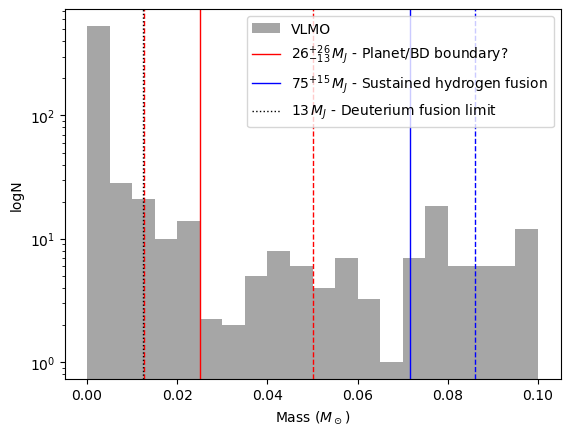

In [199]:
import numpy as np


VLMOs = (m1_values + m2S_values +
    BDcomp_data['m1_MSolar'].tolist() + 
    BDcomp_data['m2_MSolar'].tolist() +
    BDhost_data['m1_MSolar'].tolist() + 
    BDhost_data['m2_MSolar'].tolist() + 
    #BDFFPs_data['m2_MSolar'].tolist() + 
    BDSL_data['m1_MSolar'].tolist()
)

VLMOs = np.array(VLMOs)
#logVLMO = np.log10(VLMOs)

w = oneslistlike(m1_values)
weights = (w + w +
    BDcomp_data['P'].tolist() + 
    BDcomp_data['P'].tolist() +
    BDhost_data['P'].tolist() + 
    BDhost_data['P'].tolist() + 
    #BDFFPs_data['P'].tolist() + 
    BDSL_data['P'].tolist()
)

lower_bound = 10**-5.5
upper_bound = 0.1

plt.hist(
    VLMOs,
    bins=20,
    range=(lower_bound, upper_bound),
    color='grey',
    alpha=0.7,
    label="VLMO",
    weights=weights
)
plt.axvline(x=10**-1.6, color='red', linestyle='solid', linewidth=1, label=r'$26^{+26}_{-13}\,M_J$ - Planet/BD boundary?')
plt.axvline(x=10**-1.3, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=10**-1.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=MJ2Msolar(75), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=MJ2Msolar(90), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=MJ2Msolar(13), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')
plt.xlabel(r'Mass ($M_\odot$)')
plt.ylabel('logN')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()

Split at 0.03?

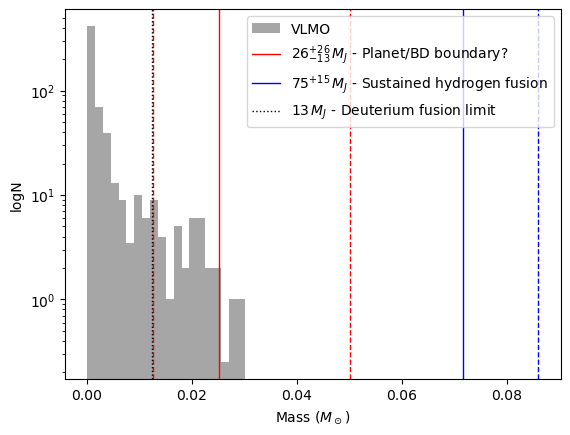

In [200]:
import numpy as np


VLMOs = (m1_values + m2S_values +
    BDcomp_data['m1_MSolar'].tolist() + 
    BDcomp_data['m2_MSolar'].tolist() +
    BDhost_data['m1_MSolar'].tolist() + 
    BDhost_data['m2_MSolar'].tolist() + 
    #BDFFPs_data['m2_MSolar'].tolist() + 
    BDSL_data['m1_MSolar'].tolist()
)

VLMOs = np.array(VLMOs)
#logVLMO = np.log10(VLMOs)

w = oneslistlike(m1_values)
weights = (w + w +
    BDcomp_data['P'].tolist() + 
    BDcomp_data['P'].tolist() +
    BDhost_data['P'].tolist() + 
    BDhost_data['P'].tolist() + 
    #BDFFPs_data['P'].tolist() + 
    BDSL_data['P'].tolist()
)

lower_bound = 10**-5.5
upper_bound = 0.03

plt.hist(
    VLMOs,
    bins=20,
    range=(lower_bound, upper_bound),
    color='grey',
    alpha=0.7,
    label="VLMO",
    weights=weights
)
plt.axvline(x=10**-1.6, color='red', linestyle='solid', linewidth=1, label=r'$26^{+26}_{-13}\,M_J$ - Planet/BD boundary?')
plt.axvline(x=10**-1.3, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=10**-1.9, color='red', linestyle='dashed', linewidth=1)
plt.axvline(x=MJ2Msolar(75), color='blue', linestyle='solid', linewidth=1, label=r'$75^{+15}\,M_J$ - Sustained hydrogen fusion')
plt.axvline(x=MJ2Msolar(90), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(x=MJ2Msolar(13), color='black', linestyle='dotted', linewidth=1, label=r'$13\,M_J$ - Deuterium fusion limit')
plt.xlabel(r'Mass ($M_\odot$)')
plt.ylabel('logN')
plt.yscale('log')  # Set y-axis to logarithmic scale for better visibility
plt.legend(loc='upper right')
plt.show()

I'm looking for a proxy for detection efficiency. I thinking maybe $u_0$. should $u_0$ be gaussian distributed? And if it is, how can that help me?

Maybe later...

img = Image.open('image.jpg')
img_resized = img.resize((400, 400))
display(img_resized) 

url = 'https://example.com/image.jpg'
with urllib.request.urlopen(url) as url:
    img = Image.open(BytesIO(url.read()))

display(img)

## Distribution-based clustering
The clustering model most closely related to statistics is based on distribution models. Clusters can then easily be defined as objects belonging most likely to the same distribution. A convenient property of this approach is that this closely resembles the way artificial data sets are generated: by sampling random objects from a distribution.

While the theoretical foundation of these methods is excellent, they suffer from overfitting unless constraints are put on the model complexity. A more complex model will usually be able to explain the data better, which makes choosing the appropriate model complexity inherently difficult.

One prominent method is known as Gaussian mixture models (using the expectation-maximization algorithm). Here, the data set is usually modeled with a fixed (to avoid overfitting) number of Gaussian distributions that are initialized randomly and whose parameters are iteratively optimized to better fit the data set. This will converge to a local optimum, so multiple runs may produce different results. In order to obtain a hard clustering, objects are often then assigned to the Gaussian distribution they most likely belong to; for soft clusterings, this is not necessary.

Distribution-based clustering produces complex models for clusters that can capture correlation and dependence between attributes. However, these algorithms put an extra burden on the user: for many real data sets, there may be no concisely defined mathematical model (e.g. assuming Gaussian distributions is a rather strong assumption on the data).

## Expectation–maximization algorithm
In statistics, an expectation–maximization (EM) algorithm is an iterative method to find (local) maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables.[1] The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step. It can be used, for example, to estimate a mixture of gaussians, or to solve the multiple linear regression problem.

![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "chess")

[2.344, 1.61, 0.893, 0.785, 1.305, 0.91, 0.604, 1.349, 0.9255, 0.512, 1.45, 1.4, 0.97, 1.115, 1.004, 1.004, 1.0, 1.197, nan, 1.119, 0.963, 1.064, 0.9756, nan, 0.872, 0.717, 1.124, 1.1266, 1.034, 1.0856, 0.604, 1.26, 1.184, 1.379, 1.12, 1.18, 0.86, 0.762, 0.763, 0.839, 1.123, 0.853, 0.754, 1.1141, 0.8601, 1.1141, 0.75, 1.376, 0.8566, 0.895, 1.954, 1.1147, 1.0379, 1.696, nan, 1.7, 0.9842, 1.21, 1.004, 0.963, 0.814, 1.086, 0.84, 0.967, 1.32, 0.607, 2.407, 3.68, 0.903, 0.851, 0.607, 0.222, 4.66, 1.822, 0.2167, 0.88, 1.3, 1.099, 4.63, 0.9091, 1.0853, 1.004, 1.202, 1.408, 1.929, 0.985, 1.276, 1.119, 0.843, 0.963, 2.396, 2.5, 1.0, 1.3134, 0.8269, nan, 1.3522, 1.004, 0.4134, 1.119, 0.91421, 1.301, 0.9091, nan, 1.039, 0.812, 0.91434, 0.9134, 1.83, 0.9136, 0.589, nan, 0.9091, 0.829, 0.582, 0.854, 0.8609, 3.68, 0.99896, 0.96835, 1.091, 0.9957, 0.833, 0.872, nan, 0.736, 1.407, 0.945, 0.927, 1.085, 0.93, 0.8146, 0.871, 0.8928, 2.425, 1.08, 1.806, 1.246, 1.54, 1.197, nan, 1.3529, 1.434, 1.344, nan, 

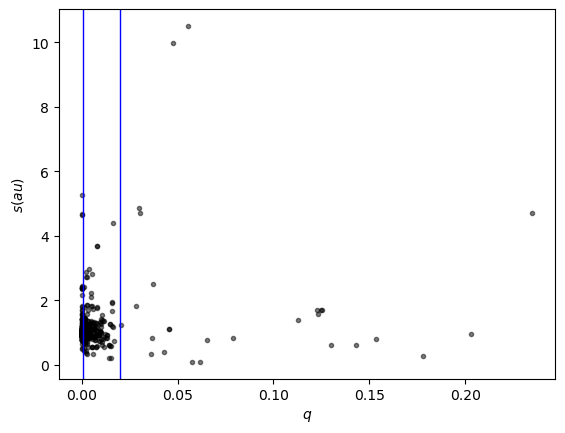

In [422]:
# plot s vs q
print(s_values)
print(q_values)
plt.scatter(q_values,s_values, marker='.', color='k', alpha=0.5)
plt.axvline(0.02, color='blue', linestyle='solid', linewidth=1, label=r'q=0.02')
plt.axvline(0.001, color='blue', linestyle='solid', linewidth=1, label=r'q=0.001')

plt.xlabel(r'$q$')
plt.ylabel(r'$s (au)$')
plt.show()

[2.344, 1.61, 0.893, 0.785, 1.305, 0.91, 0.604, 1.349, 0.9255, 0.512, 1.45, 1.4, 0.97, 1.115, 1.004, 1.004, 1.0, 1.197, nan, 1.119, 0.963, 1.064, 0.9756, nan, 0.872, 0.717, 1.124, 1.1266, 1.034, 1.0856, 0.604, 1.26, 1.184, 1.379, 1.12, 1.18, 0.86, 0.762, 0.763, 0.839, 1.123, 0.853, 0.754, 1.1141, 0.8601, 1.1141, 0.75, 1.376, 0.8566, 0.895, 1.954, 1.1147, 1.0379, 1.696, nan, 1.7, 0.9842, 1.21, 1.004, 0.963, 0.814, 1.086, 0.84, 0.967, 1.32, 0.607, 2.407, 3.68, 0.903, 0.851, 0.607, 0.222, 4.66, 1.822, 0.2167, 0.88, 1.3, 1.099, 4.63, 0.9091, 1.0853, 1.004, 1.202, 1.408, 1.929, 0.985, 1.276, 1.119, 0.843, 0.963, 2.396, 2.5, 1.0, 1.3134, 0.8269, nan, 1.3522, 1.004, 0.4134, 1.119, 0.91421, 1.301, 0.9091, nan, 1.039, 0.812, 0.91434, 0.9134, 1.83, 0.9136, 0.589, nan, 0.9091, 0.829, 0.582, 0.854, 0.8609, 3.68, 0.99896, 0.96835, 1.091, 0.9957, 0.833, 0.872, nan, 0.736, 1.407, 0.945, 0.927, 1.085, 0.93, 0.8146, 0.871, 0.8928, 2.425, 1.08, 1.806, 1.246, 1.54, 1.197, nan, 1.3529, 1.434, 1.344, nan, 

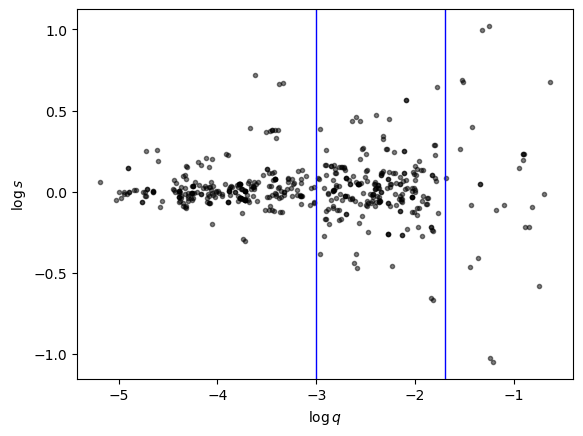

In [418]:
# plot s vs q
print(s_values)
print(q_values)
plt.scatter(np.log10(q_values),np.log10(s_values), marker='.', color='k', alpha=0.5)
plt.axvline(np.log10(0.02), color='blue', linestyle='solid', linewidth=1, label=r'q=0.02')
plt.axvline(np.log10(0.001), color='blue', linestyle='solid', linewidth=1, label=r'q=0.001')

plt.xlabel(r'$\log q$')
plt.ylabel(r'$\log s$')
plt.show()

[4.18, 2.6, 2.7, 1.71, 3.6, 1.5, 2.17, 2.575, 2.8, 0.97, 1.72, 1.08, 0.83, 0.947, 2.6, 3.1, 4.27, 0.69, 4.0, 0.55, 0.73, 6.4, 2.03, 3.4, 3.15, 2.77, 4.75, 0.9, 3.82, 1.16, 2.04, 5.0, 2.8, 5.32, 0.62, 2.0, 3.4, 2.1, 2.1, 3.04, 4.51, 3.29, 1.5, 2.7, 2.42, 2.1, 0.8, 2.424, 2.42, 2.4, 0.8, 2.1, 1.51, 0.87, 4.61, 0.86, 1.16, 0.59, 2.2, 0.763, 0.883, 1.63, 2.97, 1.45, 3.92, 0.79, 0.93, 3.4, 2.7, 1.8, 0.8, 0.5, 8.0, 4.3, 0.5, 2.6, 3.5, 0.657, 8.0, 2.1, 1.16, 3.0, 0.85, 2.72, 0.8, 0.72, 1.8, 0.56, 1.7, 1.083, 0.95, 4.3, 4.54, 3.8, 1.75, 1.039, 1.2, 2.5, 0.74, 2.7, 3.2, 3.45, 2.1, 3.5, 1.89, 1.68, 3.2, 1.8, 3.4, 1.8, 0.39, 2.3, 2.7, 2.2, 0.8, 3.29, 1.84, 11.5, 1.26, 1.04, 1.63, 1.98, 3.9, 3.28, 3.02, 1.1, 3.4, 1.09, 1.25, 1.25, 1.1, 2.59, 1.02, 0.9, 4.3, 1.1, 2.72, 3.59, 3.913, 0.52, 4.8, 1.6, 4.2, 6.56, 4.6, 3.6, 2.7, 4.13, 1.0, 3.4, 1.1, 1.0, 1.7, 2.7, 2.1, 2.6, 2.0, 4.63, 1.8, 0.37, 0.62, 0.689, 4.3, 1.8, 1.7, 1.7, 1.45, 0.39, 1.51, 0.67, 0.85, 4.5, 2.8, 4.14, 1.16, 5.4, 0.89, 1.065, 0.77, 2

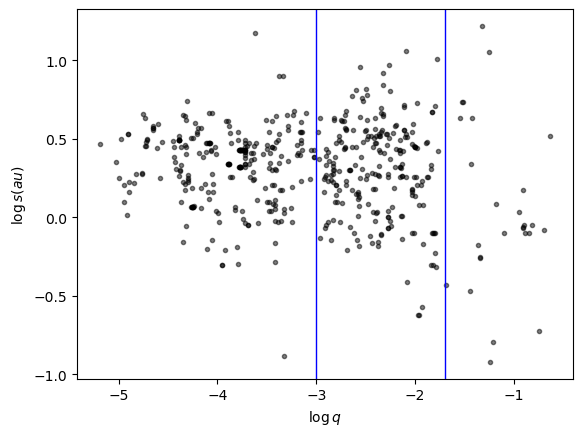

In [419]:
# plot s [au] vs q
print(s_au_values)
print(q_values)

plt.scatter(np.log10(q_values),np.log10(s_au_values), marker='.', color='k', alpha=0.5)

plt.axvline(np.log10(0.02), color='blue', linestyle='solid', linewidth=1, label=r'q=0.02')
plt.axvline(np.log10(0.001), color='blue', linestyle='solid', linewidth=1, label=r'q=0.001')

plt.xlabel(r'$\log q$')
plt.ylabel(r'$\log s (au)$')
plt.show()

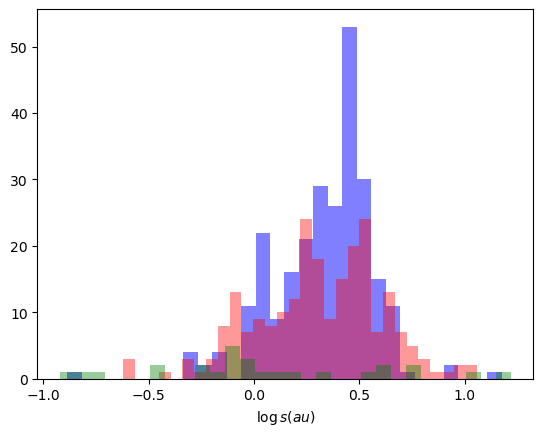

In [414]:
s_au_arr = np.array(s_au_values)
q_arr = np.array(q_values)

Q1 = 0.001
Q2 = 0.02

plt.hist(np.log10(s_au_arr[q_arr<Q1]), bins=30, color='blue', alpha=0.5, label='q<%f1.2' %Q)
#arr2 = arr[np.where((arr >5) & (arr <25))]
plt.hist(np.log10(s_au_arr[np.where((q_arr>Q1) & (q_arr<Q2))]), bins=30, color='red', alpha=0.4, label='%f1.2<q<%f1.2' %(Q1, Q2))
plt.hist(np.log10(s_au_arr[q_arr>Q2]), bins=30, color='green', alpha=0.4, label='>%f1.2' %Q2)

plt.xlabel(r'$\log s (au)$')
plt.show()

[4.18, 2.6, 2.7, 1.71, 3.6, 1.5, 2.17, 2.575, 2.8, 0.97, 1.72, 1.08, 0.83, 0.947, 2.6, 3.1, 4.27, 0.69, 4.0, 0.55, 0.73, 6.4, 2.03, 3.4, 3.15, 2.77, 4.75, 0.9, 3.82, 1.16, 2.04, 5.0, 2.8, 5.32, 0.62, 2.0, 3.4, 2.1, 2.1, 3.04, 4.51, 3.29, 1.5, 2.7, 2.42, 2.1, 0.8, 2.424, 2.42, 2.4, 0.8, 2.1, 1.51, 0.87, 4.61, 0.86, 1.16, 0.59, 2.2, 0.763, 0.883, 1.63, 2.97, 1.45, 3.92, 0.79, 0.93, 3.4, 2.7, 1.8, 0.8, 0.5, 8.0, 4.3, 0.5, 2.6, 3.5, 0.657, 8.0, 2.1, 1.16, 3.0, 0.85, 2.72, 0.8, 0.72, 1.8, 0.56, 1.7, 1.083, 0.95, 4.3, 4.54, 3.8, 1.75, 1.039, 1.2, 2.5, 0.74, 2.7, 3.2, 3.45, 2.1, 3.5, 1.89, 1.68, 3.2, 1.8, 3.4, 1.8, 0.39, 2.3, 2.7, 2.2, 0.8, 3.29, 1.84, 11.5, 1.26, 1.04, 1.63, 1.98, 3.9, 3.28, 3.02, 1.1, 3.4, 1.09, 1.25, 1.25, 1.1, 2.59, 1.02, 0.9, 4.3, 1.1, 2.72, 3.59, 3.913, 0.52, 4.8, 1.6, 4.2, 6.56, 4.6, 3.6, 2.7, 4.13, 1.0, 3.4, 1.1, 1.0, 1.7, 2.7, 2.1, 2.6, 2.0, 4.63, 1.8, 0.37, 0.62, 0.689, 4.3, 1.8, 1.7, 1.7, 1.45, 0.39, 1.51, 0.67, 0.85, 4.5, 2.8, 4.14, 1.16, 5.4, 0.89, 1.065, 0.77, 2

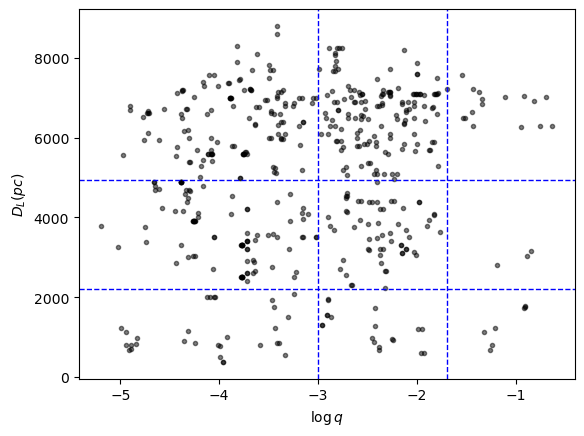

In [462]:
# plot d [pc] vs q
print(s_au_values)
print(q_values)

plt.scatter(np.log10(q_values),DL_values, marker='.', color='k', alpha=0.5)

plt.axvline(np.log10(0.02), color='blue', linestyle='dashed', linewidth=1, label=r'q=0.02')
plt.axvline(np.log10(0.001), color='blue', linestyle='dashed', linewidth=1, label=r'q=0.001')
plt.axhline(2200, color='blue', linestyle='dashed', linewidth=1, label=r'$d=2200\,pc$')
plt.axhline(4950, color='blue', linestyle='dashed', linewidth=1, label=r'$d=4950\,pc$')

plt.xlabel(r'$\log q$')
plt.ylabel(r'$D_L (pc)$')
plt.show()

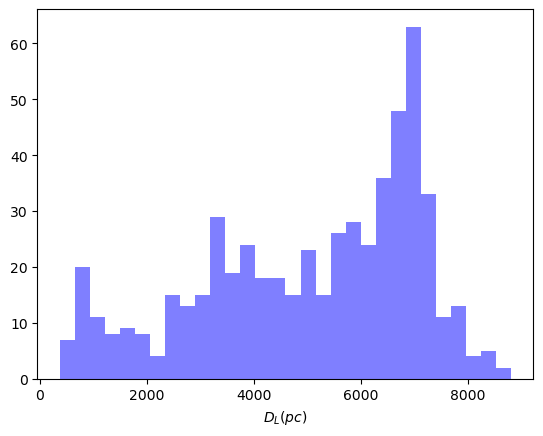

In [457]:
# histogram DL
plt.hist(DL_values, bins=30, color='blue', alpha=0.5, label='q<%f1.2' %Q)

plt.xlabel(r'$D_L (pc)$')
plt.show()

[4.18, 2.6, 2.7, 1.71, 3.6, 1.5, 2.17, 2.575, 2.8, 0.97, 1.72, 1.08, 0.83, 0.947, 2.6, 3.1, 4.27, 0.69, 4.0, 0.55, 0.73, 6.4, 2.03, 3.4, 3.15, 2.77, 4.75, 0.9, 3.82, 1.16, 2.04, 5.0, 2.8, 5.32, 0.62, 2.0, 3.4, 2.1, 2.1, 3.04, 4.51, 3.29, 1.5, 2.7, 2.42, 2.1, 0.8, 2.424, 2.42, 2.4, 0.8, 2.1, 1.51, 0.87, 4.61, 0.86, 1.16, 0.59, 2.2, 0.763, 0.883, 1.63, 2.97, 1.45, 3.92, 0.79, 0.93, 3.4, 2.7, 1.8, 0.8, 0.5, 8.0, 4.3, 0.5, 2.6, 3.5, 0.657, 8.0, 2.1, 1.16, 3.0, 0.85, 2.72, 0.8, 0.72, 1.8, 0.56, 1.7, 1.083, 0.95, 4.3, 4.54, 3.8, 1.75, 1.039, 1.2, 2.5, 0.74, 2.7, 3.2, 3.45, 2.1, 3.5, 1.89, 1.68, 3.2, 1.8, 3.4, 1.8, 0.39, 2.3, 2.7, 2.2, 0.8, 3.29, 1.84, 11.5, 1.26, 1.04, 1.63, 1.98, 3.9, 3.28, 3.02, 1.1, 3.4, 1.09, 1.25, 1.25, 1.1, 2.59, 1.02, 0.9, 4.3, 1.1, 2.72, 3.59, 3.913, 0.52, 4.8, 1.6, 4.2, 6.56, 4.6, 3.6, 2.7, 4.13, 1.0, 3.4, 1.1, 1.0, 1.7, 2.7, 2.1, 2.6, 2.0, 4.63, 1.8, 0.37, 0.62, 0.689, 4.3, 1.8, 1.7, 1.7, 1.45, 0.39, 1.51, 0.67, 0.85, 4.5, 2.8, 4.14, 1.16, 5.4, 0.89, 1.065, 0.77, 2

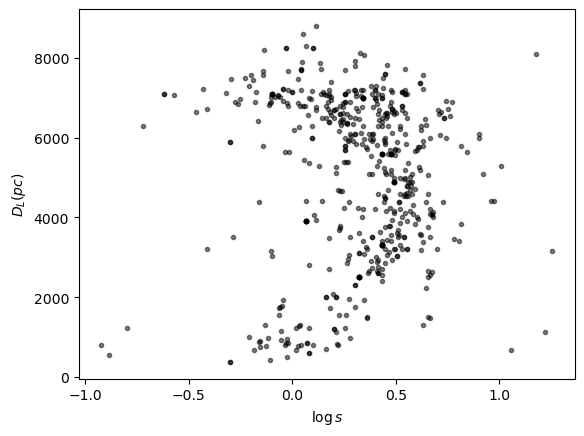

In [444]:
# plot d [pc] vs s
print(s_au_values)
print(q_values)

plt.scatter(np.log10(s_au_values),DL_values, marker='.', color='k', alpha=0.5)

#plt.axvline(np.log10(0.02), color='blue', linestyle='solid', linewidth=1, label=r'q=0.02')
#plt.axvline(np.log10(0.001), color='blue', linestyle='solid', linewidth=1, label=r'q=0.001')

plt.xlabel(r'$\log s$')
plt.ylabel(r'$D_L (pc)$')
plt.show()

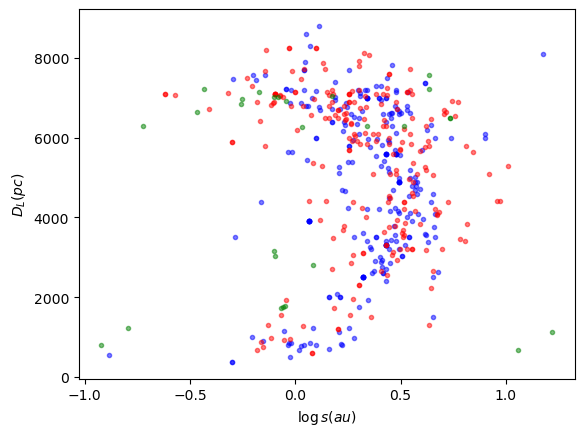

In [447]:
s_au_arr = np.array(s_au_values)
q_arr = np.array(q_values)
d_arr = np.array(DL_values)

Q1 = 0.001
Q2 = 0.02

plt.scatter(\
    np.log10(s_au_arr[q_arr<Q1]), d_arr[q_arr<Q1]\
    , marker='.'\
    , color='blue'\
    , alpha=0.5\
    , label='q<%f1.2' %Q1\
)
plt.scatter(\
    np.log10(s_au_arr[np.where((q_arr>Q1) & (q_arr<Q2))])
    , d_arr[np.where((q_arr>Q1) & (q_arr<Q2))]\
    , marker='.'\
    , color='red'\
    , alpha=0.5\
    , label='%f1.2<q<%f1.2' %(Q1, Q2)\
)
plt.scatter(\
    np.log10(s_au_arr[q_arr>Q2]), d_arr[q_arr>Q2]\
    , marker='.'\
    , color='green'\
    , alpha=0.5\
    , label='>%f1.2' %Q2\
)

plt.xlabel(r'$\log s (au)$')
plt.ylabel(r'$D_L (pc)$')
plt.show()

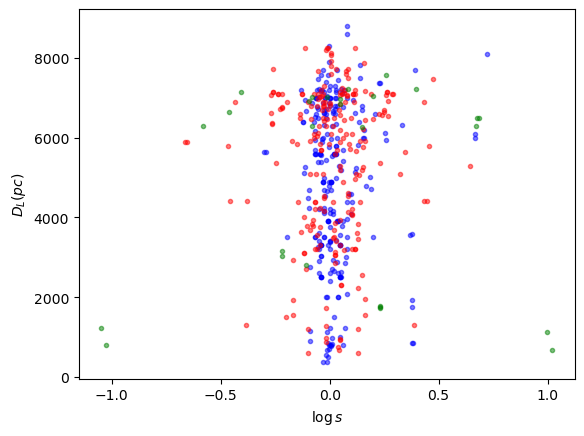

In [448]:
s_arr = np.array(s_values)
q_arr = np.array(q_values)
d_arr = np.array(DL_values)

Q1 = 0.001
Q2 = 0.02

plt.scatter(\
    np.log10(s_arr[q_arr<Q1]), d_arr[q_arr<Q1]\
    , marker='.'\
    , color='blue'\
    , alpha=0.5\
    , label='q<%f1.2' %Q1\
)
plt.scatter(\
    np.log10(s_arr[np.where((q_arr>Q1) & (q_arr<Q2))])
    , d_arr[np.where((q_arr>Q1) & (q_arr<Q2))]\
    , marker='.'\
    , color='red'\
    , alpha=0.5\
    , label='%f1.2<q<%f1.2' %(Q1, Q2)\
)
plt.scatter(\
    np.log10(s_arr[q_arr>Q2]), d_arr[q_arr>Q2]\
    , marker='.'\
    , color='green'\
    , alpha=0.5\
    , label='>%f1.2' %Q2\
)

plt.xlabel(r'$\log s$')
plt.ylabel(r'$D_L (pc)$')
plt.show()

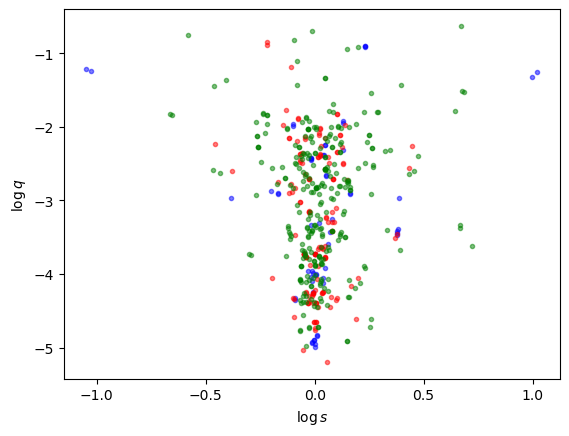

In [464]:
s_arr = np.array(s_values)
q_arr = np.array(q_values)
d_arr = np.array(DL_values)

plt.scatter(\
    np.log10(s_arr[d_arr<2500]), np.log10(q_arr[d_arr<2500])\
    , marker='.'\
    , color='blue'\
    , alpha=0.5\
    , label='q<%f1.2' %Q1\
)
plt.scatter(\
    np.log10(s_arr[np.where((d_arr>2500) & (d_arr<4950))])
    , np.log10(q_arr[np.where((d_arr>2500) & (d_arr<4950))])\
    , marker='.'\
    , color='red'\
    , alpha=0.5\
    , label='%f1.2<q<%f1.2' %(Q1, Q2)\
)
plt.scatter(\
    np.log10(s_arr[d_arr>4950]), np.log10(q_arr[d_arr>4950])\
    , marker='.'\
    , color='green'\
    , alpha=0.5\
    , label='>%f1.2' %Q2\
)

plt.xlabel(r'$\log s$')
plt.ylabel(r'$\log q$')
plt.show()

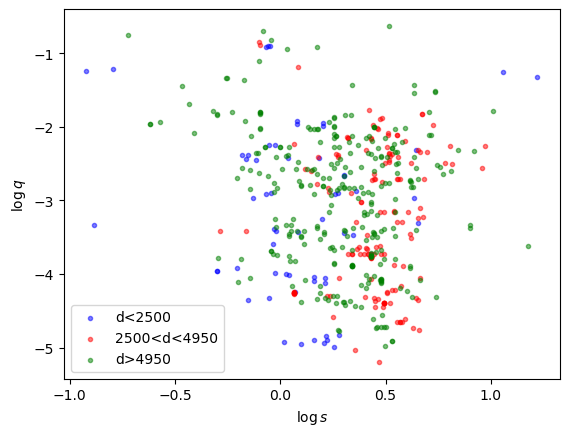

In [468]:
s_arr = np.array(s_au_values)
q_arr = np.array(q_values)
d_arr = np.array(DL_values)

plt.scatter(\
    np.log10(s_arr[d_arr<2500]), np.log10(q_arr[d_arr<2500])\
    , marker='.'\
    , color='blue'\
    , alpha=0.5\
    , label='d<2500'\
)
plt.scatter(\
    np.log10(s_arr[np.where((d_arr>2500) & (d_arr<4950))])
    , np.log10(q_arr[np.where((d_arr>2500) & (d_arr<4950))])\
    , marker='.'\
    , color='red'\
    , alpha=0.5\
    , label='2500<d<4950'\
)
plt.scatter(\
    np.log10(s_arr[d_arr>4950]), np.log10(q_arr[d_arr>4950])\
    , marker='.'\
    , color='green'\
    , alpha=0.5\
    , label='d>4950'\
)

plt.legend()
plt.xlabel(r'$\log s (au)$')
plt.ylabel(r'$\log q$')
plt.show()

Is the exoplanet data including degenerate solutions?

In [474]:
for i, s in enumerate(s_values):
    if s < 0.1 or s > 9.0:
        print(i, s)

# 346, 353, 356, 357

IDs = np.array(ID_list)
IDs[[346, 353, 356, 357]]

#array(['KMT-2020-BLG-0414L c', 'KMT-2020-BLG-0414L c',
#       'KMT-2020-BLG-0414L c', 'KMT-2020-BLG-0414L c'], dtype='<U24')

346 0.0895
353 10.5031
356 9.9713
357 0.094


array(['KMT-2020-BLG-0414L c', 'KMT-2020-BLG-0414L c',
       'KMT-2020-BLG-0414L c', 'KMT-2020-BLG-0414L c'], dtype='<U24')